# Linear Regression

선형회귀(Linear Regression)은 선형 상관 관계를 모델링 하는 기법으로 종속 변수 Y와 한 개 이상의 독립 젼수 X로 계산됨. 식은 아래와 같다.

$$ H(x) = Wx + b $$

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

## 정규 방정식을 사용한 선형회귀 계산

비용 함수를 최소화 하는 파라미터들(W, b)을 찾기 위한 해석적인 방법이 있을 바로 <b>정규방정식</b>

$$\theta = (X^T * X)^{-1}X^Ty$$

In [1]:
import numpy as np

In [2]:
np.random.seed(1)

In [3]:
x =  3 * np.random.rand(100, 1)
y = 1 + 2*x + np.random.randn(100, 1)
# y = 1 + 2*x

In [4]:
import matplotlib.pyplot as plt

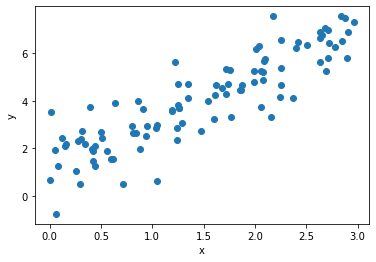

In [5]:
scatter = plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()



정규방정식 해를 구함

In [6]:
x_b = np.concatenate((np.ones((100, 1)), x), axis=1)

In [7]:
x_b.shape

(100, 2)

In [8]:
x_b[:2]

array([[1.        , 1.25106601],
       [1.        , 2.16097348]])

In [9]:
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [10]:
theta # 노이즈에 의해 완벽하게 파라미터가 나오진 않음

array([[1.23695725],
       [1.89497503]])

구한 theta_hat에서부터 prediction 

In [11]:
x_test = np.array([[1], [2], [3], [4]])
x_test_b = np.concatenate((np.ones((len(x_test), 1)), x_test), axis=1)

In [12]:
x_test_b.shape

(4, 2)

In [13]:
theta.shape

(2, 1)

In [14]:
x_test_b.dot(theta)

array([[3.13193228],
       [5.02690731],
       [6.92188234],
       [8.81685737]])

## 경사 하강법을 사용한 선형회귀 계산1 - sklearn사용

선형회귀에서 독립 변수 X가 많을 경우(특성수가 많을 경우)에는 정규방정식이 느리므로 SGD(경사 하강법)을 사용함

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x, y)

LinearRegression()

위에서 정규방정식을 사용한 결과와 같음

In [18]:
lr.intercept_, lr.coef_

(array([1.23695725]), array([[1.89497503]]))

In [19]:
lr.predict(x_test)

array([[3.13193228],
       [5.02690731],
       [6.92188234],
       [8.81685737]])

## 경사 하상법을 사용한 선형회귀 계산2 - pytorch

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [21]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [22]:
model = LinearRegressionModel()

In [23]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.5948]], requires_grad=True), Parameter containing:
 tensor([-0.0300], requires_grad=True)]

In [24]:
# 데이터
x_train = torch.FloatTensor(x)
y_train = torch.FloatTensor(y)
# 모델 초기화
model = LinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: 1.038, b: 0.243 Cost: 7.327103
Epoch  100/1000 W: 2.040, b: 0.968 Cost: 0.819576
Epoch  200/1000 W: 1.990, b: 1.061 Cost: 0.808259
Epoch  300/1000 W: 1.957, b: 1.122 Cost: 0.803406
Epoch  400/1000 W: 1.936, b: 1.162 Cost: 0.801325
Epoch  500/1000 W: 1.922, b: 1.188 Cost: 0.800432
Epoch  600/1000 W: 1.912, b: 1.205 Cost: 0.800049
Epoch  700/1000 W: 1.906, b: 1.216 Cost: 0.799885
Epoch  800/1000 W: 1.902, b: 1.223 Cost: 0.799815
Epoch  900/1000 W: 1.900, b: 1.228 Cost: 0.799785
Epoch 1000/1000 W: 1.898, b: 1.231 Cost: 0.799772
